# 실행

In [2]:
from final_functions.final_transformer import *

In [3]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

# Hyper Parameter
input_window = 100
output_window = 60
epochs = 150
batch_size = 512

# Dataset 불러오기
df_DL = time_series_dataframe()
df_DL_temp = df_DL['TEMP'].values
df_DL_label = df_DL['label'].values

train_len = int(len(df_DL) * 0.7)
train_data = df_DL_temp[:train_len]
test_data = df_DL_temp[train_len:]
train_label = df_DL_label[:train_len]
test_label = df_DL_label[train_len:]


train_data = scaler_train.fit_transform(train_data.reshape(-1,1)).reshape(-1)
test_data = scaler_test.fit_transform(test_data.reshape(-1,1)).reshape(-1)

train_data, _ = multistep_time_series(train_data, train_label, input_window, output_window)
test_data, test_label = multistep_time_series(test_data, test_label, input_window, output_window)

X_train = train_data[:, 0, :].reshape((-1,input_window, 1))
y_train = train_data[:, 1, :].reshape((-1,input_window, 1))
X_test = test_data[:, 0, :].reshape((-1,input_window, 1))
y_test = test_data[:, 1, :].reshape((-1,input_window, 1))


# PyTorch 돌리기위한 설정
lr = 0.001
device = 'cuda' if torch.cuda.is_available else 'cpu' 
model = TransAm().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.98)

train_dataset = TimeSeiresDataset(X_train, y_train, input_window)
test_dataset = TimeSeiresDataset(X_test, y_test, input_window)
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)
train_data = train_data.to(device)
test_data = test_data.to(device)

|epoch   1 |     0/  909 batches | lr 0.000960 | loss 0.00030
|epoch   1 |   181/  909 batches | lr 0.000960 | loss 0.04607
|epoch   1 |   362/  909 batches | lr 0.000960 | loss 0.04542
|epoch   1 |   543/  909 batches | lr 0.000960 | loss 0.04535
|epoch   1 |   724/  909 batches | lr 0.000960 | loss 0.04513
|epoch   1 |   905/  909 batches | lr 0.000960 | loss 0.04493


100%|██████████| 390/390 [00:12<00:00, 30.23it/s]


---------------------------------------------------------------------------
| end of epoch   1 | time: 90.98s | valid loss 0.00014 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   2 |     0/  909 batches | lr 0.000941 | loss 0.00025
|epoch   2 |   181/  909 batches | lr 0.000941 | loss 0.04500
|epoch   2 |   362/  909 batches | lr 0.000941 | loss 0.04487
|epoch   2 |   543/  909 batches | lr 0.000941 | loss 0.04481
|epoch   2 |   724/  909 batches | lr 0.000941 | loss 0.04477
|epoch   2 |   905/  909 batches | lr 0.000941 | loss 0.04456


100%|██████████| 390/390 [00:12<00:00, 30.37it/s]


---------------------------------------------------------------------------
| end of epoch   2 | time: 91.45s | valid loss 0.00014 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   3 |     0/  909 batches | lr 0.000922 | loss 0.00024
|epoch   3 |   181/  909 batches | lr 0.000922 | loss 0.04452
|epoch   3 |   362/  909 batches | lr 0.000922 | loss 0.04413
|epoch   3 |   543/  909 batches | lr 0.000922 | loss 0.04428
|epoch   3 |   724/  909 batches | lr 0.000922 | loss 0.04432
|epoch   3 |   905/  909 batches | lr 0.000922 | loss 0.04422


100%|██████████| 390/390 [00:12<00:00, 31.48it/s]


---------------------------------------------------------------------------
| end of epoch   3 | time: 91.17s | valid loss 0.00012 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   4 |     0/  909 batches | lr 0.000904 | loss 0.00025
|epoch   4 |   181/  909 batches | lr 0.000904 | loss 0.04423
|epoch   4 |   362/  909 batches | lr 0.000904 | loss 0.04385
|epoch   4 |   543/  909 batches | lr 0.000904 | loss 0.04391
|epoch   4 |   724/  909 batches | lr 0.000904 | loss 0.04419
|epoch   4 |   905/  909 batches | lr 0.000904 | loss 0.04410


100%|██████████| 390/390 [00:12<00:00, 30.52it/s]


---------------------------------------------------------------------------
| end of epoch   4 | time: 91.25s | valid loss 0.00014 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   5 |     0/  909 batches | lr 0.000886 | loss 0.00026
|epoch   5 |   181/  909 batches | lr 0.000886 | loss 0.04381
|epoch   5 |   362/  909 batches | lr 0.000886 | loss 0.04404
|epoch   5 |   543/  909 batches | lr 0.000886 | loss 0.04379
|epoch   5 |   724/  909 batches | lr 0.000886 | loss 0.04385
|epoch   5 |   905/  909 batches | lr 0.000886 | loss 0.04381


100%|██████████| 390/390 [00:12<00:00, 30.06it/s]


---------------------------------------------------------------------------
| end of epoch   5 | time: 91.70s | valid loss 0.00013 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   6 |     0/  909 batches | lr 0.000868 | loss 0.00024
|epoch   6 |   181/  909 batches | lr 0.000868 | loss 0.04374
|epoch   6 |   362/  909 batches | lr 0.000868 | loss 0.04357
|epoch   6 |   543/  909 batches | lr 0.000868 | loss 0.04389
|epoch   6 |   724/  909 batches | lr 0.000868 | loss 0.04370
|epoch   6 |   905/  909 batches | lr 0.000868 | loss 0.04373


100%|██████████| 390/390 [00:12<00:00, 30.27it/s]


---------------------------------------------------------------------------
| end of epoch   6 | time: 91.69s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   7 |     0/  909 batches | lr 0.000851 | loss 0.00024
|epoch   7 |   181/  909 batches | lr 0.000851 | loss 0.04353
|epoch   7 |   362/  909 batches | lr 0.000851 | loss 0.04356
|epoch   7 |   543/  909 batches | lr 0.000851 | loss 0.04358
|epoch   7 |   724/  909 batches | lr 0.000851 | loss 0.04387
|epoch   7 |   905/  909 batches | lr 0.000851 | loss 0.04333


100%|██████████| 390/390 [00:12<00:00, 31.26it/s]


---------------------------------------------------------------------------
| end of epoch   7 | time: 90.20s | valid loss 0.00011 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   8 |     0/  909 batches | lr 0.000834 | loss 0.00025
|epoch   8 |   181/  909 batches | lr 0.000834 | loss 0.04350
|epoch   8 |   362/  909 batches | lr 0.000834 | loss 0.04338
|epoch   8 |   543/  909 batches | lr 0.000834 | loss 0.04345
|epoch   8 |   724/  909 batches | lr 0.000834 | loss 0.04358
|epoch   8 |   905/  909 batches | lr 0.000834 | loss 0.04307


100%|██████████| 390/390 [00:12<00:00, 31.26it/s]


---------------------------------------------------------------------------
| end of epoch   8 | time: 90.11s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch   9 |     0/  909 batches | lr 0.000817 | loss 0.00025
|epoch   9 |   181/  909 batches | lr 0.000817 | loss 0.04358
|epoch   9 |   362/  909 batches | lr 0.000817 | loss 0.04322
|epoch   9 |   543/  909 batches | lr 0.000817 | loss 0.04318
|epoch   9 |   724/  909 batches | lr 0.000817 | loss 0.04323
|epoch   9 |   905/  909 batches | lr 0.000817 | loss 0.04342


100%|██████████| 390/390 [00:12<00:00, 31.27it/s]


---------------------------------------------------------------------------
| end of epoch   9 | time: 89.88s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  10 |     0/  909 batches | lr 0.000801 | loss 0.00023
|epoch  10 |   181/  909 batches | lr 0.000801 | loss 0.04319
|epoch  10 |   362/  909 batches | lr 0.000801 | loss 0.04340
|epoch  10 |   543/  909 batches | lr 0.000801 | loss 0.04314
|epoch  10 |   724/  909 batches | lr 0.000801 | loss 0.04313
|epoch  10 |   905/  909 batches | lr 0.000801 | loss 0.04334


100%|██████████| 390/390 [00:12<00:00, 31.26it/s]


---------------------------------------------------------------------------
| end of epoch  10 | time: 90.13s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  11 |     0/  909 batches | lr 0.000785 | loss 0.00024
|epoch  11 |   181/  909 batches | lr 0.000785 | loss 0.04318
|epoch  11 |   362/  909 batches | lr 0.000785 | loss 0.04312
|epoch  11 |   543/  909 batches | lr 0.000785 | loss 0.04323
|epoch  11 |   724/  909 batches | lr 0.000785 | loss 0.04317
|epoch  11 |   905/  909 batches | lr 0.000785 | loss 0.04325


100%|██████████| 390/390 [00:12<00:00, 30.48it/s]


---------------------------------------------------------------------------
| end of epoch  11 | time: 91.56s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  12 |     0/  909 batches | lr 0.000769 | loss 0.00024
|epoch  12 |   181/  909 batches | lr 0.000769 | loss 0.04318
|epoch  12 |   362/  909 batches | lr 0.000769 | loss 0.04286
|epoch  12 |   543/  909 batches | lr 0.000769 | loss 0.04313
|epoch  12 |   724/  909 batches | lr 0.000769 | loss 0.04334
|epoch  12 |   905/  909 batches | lr 0.000769 | loss 0.04316


100%|██████████| 390/390 [00:11<00:00, 34.13it/s]


---------------------------------------------------------------------------
| end of epoch  12 | time: 90.37s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  13 |     0/  909 batches | lr 0.000754 | loss 0.00025
|epoch  13 |   181/  909 batches | lr 0.000754 | loss 0.04305
|epoch  13 |   362/  909 batches | lr 0.000754 | loss 0.04322
|epoch  13 |   543/  909 batches | lr 0.000754 | loss 0.04317
|epoch  13 |   724/  909 batches | lr 0.000754 | loss 0.04295
|epoch  13 |   905/  909 batches | lr 0.000754 | loss 0.04316


100%|██████████| 390/390 [00:11<00:00, 34.41it/s]


---------------------------------------------------------------------------
| end of epoch  13 | time: 87.36s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  14 |     0/  909 batches | lr 0.000739 | loss 0.00023
|epoch  14 |   181/  909 batches | lr 0.000739 | loss 0.04309
|epoch  14 |   362/  909 batches | lr 0.000739 | loss 0.04294
|epoch  14 |   543/  909 batches | lr 0.000739 | loss 0.04313
|epoch  14 |   724/  909 batches | lr 0.000739 | loss 0.04304
|epoch  14 |   905/  909 batches | lr 0.000739 | loss 0.04317


100%|██████████| 390/390 [00:11<00:00, 34.22it/s]


---------------------------------------------------------------------------
| end of epoch  14 | time: 87.40s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  15 |     0/  909 batches | lr 0.000724 | loss 0.00024
|epoch  15 |   181/  909 batches | lr 0.000724 | loss 0.04308
|epoch  15 |   362/  909 batches | lr 0.000724 | loss 0.04307
|epoch  15 |   543/  909 batches | lr 0.000724 | loss 0.04300
|epoch  15 |   724/  909 batches | lr 0.000724 | loss 0.04315
|epoch  15 |   905/  909 batches | lr 0.000724 | loss 0.04305


100%|██████████| 390/390 [00:11<00:00, 34.29it/s]


---------------------------------------------------------------------------
| end of epoch  15 | time: 87.40s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  16 |     0/  909 batches | lr 0.000709 | loss 0.00024
|epoch  16 |   181/  909 batches | lr 0.000709 | loss 0.04297
|epoch  16 |   362/  909 batches | lr 0.000709 | loss 0.04281
|epoch  16 |   543/  909 batches | lr 0.000709 | loss 0.04303
|epoch  16 |   724/  909 batches | lr 0.000709 | loss 0.04326
|epoch  16 |   905/  909 batches | lr 0.000709 | loss 0.04312


100%|██████████| 390/390 [00:11<00:00, 34.27it/s]


---------------------------------------------------------------------------
| end of epoch  16 | time: 88.18s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  17 |     0/  909 batches | lr 0.000695 | loss 0.00024
|epoch  17 |   181/  909 batches | lr 0.000695 | loss 0.04311
|epoch  17 |   362/  909 batches | lr 0.000695 | loss 0.04278
|epoch  17 |   543/  909 batches | lr 0.000695 | loss 0.04314
|epoch  17 |   724/  909 batches | lr 0.000695 | loss 0.04311
|epoch  17 |   905/  909 batches | lr 0.000695 | loss 0.04290


100%|██████████| 390/390 [00:11<00:00, 34.17it/s]


---------------------------------------------------------------------------
| end of epoch  17 | time: 87.93s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  18 |     0/  909 batches | lr 0.000681 | loss 0.00024
|epoch  18 |   181/  909 batches | lr 0.000681 | loss 0.04296
|epoch  18 |   362/  909 batches | lr 0.000681 | loss 0.04287
|epoch  18 |   543/  909 batches | lr 0.000681 | loss 0.04302
|epoch  18 |   724/  909 batches | lr 0.000681 | loss 0.04305
|epoch  18 |   905/  909 batches | lr 0.000681 | loss 0.04315


100%|██████████| 390/390 [00:11<00:00, 34.54it/s]


---------------------------------------------------------------------------
| end of epoch  18 | time: 87.49s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  19 |     0/  909 batches | lr 0.000668 | loss 0.00024
|epoch  19 |   181/  909 batches | lr 0.000668 | loss 0.04313
|epoch  19 |   362/  909 batches | lr 0.000668 | loss 0.04291
|epoch  19 |   543/  909 batches | lr 0.000668 | loss 0.04305
|epoch  19 |   724/  909 batches | lr 0.000668 | loss 0.04284
|epoch  19 |   905/  909 batches | lr 0.000668 | loss 0.04303


100%|██████████| 390/390 [00:11<00:00, 34.09it/s]


---------------------------------------------------------------------------
| end of epoch  19 | time: 87.92s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  20 |     0/  909 batches | lr 0.000654 | loss 0.00024
|epoch  20 |   181/  909 batches | lr 0.000654 | loss 0.04287
|epoch  20 |   362/  909 batches | lr 0.000654 | loss 0.04311
|epoch  20 |   543/  909 batches | lr 0.000654 | loss 0.04307
|epoch  20 |   724/  909 batches | lr 0.000654 | loss 0.04294
|epoch  20 |   905/  909 batches | lr 0.000654 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 34.03it/s]


---------------------------------------------------------------------------
| end of epoch  20 | time: 87.66s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  21 |     0/  909 batches | lr 0.000641 | loss 0.00025
|epoch  21 |   181/  909 batches | lr 0.000641 | loss 0.04309
|epoch  21 |   362/  909 batches | lr 0.000641 | loss 0.04297
|epoch  21 |   543/  909 batches | lr 0.000641 | loss 0.04303
|epoch  21 |   724/  909 batches | lr 0.000641 | loss 0.04303
|epoch  21 |   905/  909 batches | lr 0.000641 | loss 0.04266


100%|██████████| 390/390 [00:11<00:00, 34.17it/s]


---------------------------------------------------------------------------
| end of epoch  21 | time: 87.91s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  22 |     0/  909 batches | lr 0.000628 | loss 0.00023
|epoch  22 |   181/  909 batches | lr 0.000628 | loss 0.04292
|epoch  22 |   362/  909 batches | lr 0.000628 | loss 0.04295
|epoch  22 |   543/  909 batches | lr 0.000628 | loss 0.04280
|epoch  22 |   724/  909 batches | lr 0.000628 | loss 0.04298
|epoch  22 |   905/  909 batches | lr 0.000628 | loss 0.04309


100%|██████████| 390/390 [00:11<00:00, 34.57it/s]


---------------------------------------------------------------------------
| end of epoch  22 | time: 87.60s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  23 |     0/  909 batches | lr 0.000616 | loss 0.00023
|epoch  23 |   181/  909 batches | lr 0.000616 | loss 0.04290
|epoch  23 |   362/  909 batches | lr 0.000616 | loss 0.04275
|epoch  23 |   543/  909 batches | lr 0.000616 | loss 0.04289
|epoch  23 |   724/  909 batches | lr 0.000616 | loss 0.04311
|epoch  23 |   905/  909 batches | lr 0.000616 | loss 0.04315


100%|██████████| 390/390 [00:11<00:00, 34.48it/s]


---------------------------------------------------------------------------
| end of epoch  23 | time: 87.59s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  24 |     0/  909 batches | lr 0.000603 | loss 0.00023
|epoch  24 |   181/  909 batches | lr 0.000603 | loss 0.04302
|epoch  24 |   362/  909 batches | lr 0.000603 | loss 0.04302
|epoch  24 |   543/  909 batches | lr 0.000603 | loss 0.04291
|epoch  24 |   724/  909 batches | lr 0.000603 | loss 0.04283
|epoch  24 |   905/  909 batches | lr 0.000603 | loss 0.04296


100%|██████████| 390/390 [00:13<00:00, 29.93it/s]


---------------------------------------------------------------------------
| end of epoch  24 | time: 91.08s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  25 |     0/  909 batches | lr 0.000591 | loss 0.00023
|epoch  25 |   181/  909 batches | lr 0.000591 | loss 0.04310
|epoch  25 |   362/  909 batches | lr 0.000591 | loss 0.04304
|epoch  25 |   543/  909 batches | lr 0.000591 | loss 0.04288
|epoch  25 |   724/  909 batches | lr 0.000591 | loss 0.04267
|epoch  25 |   905/  909 batches | lr 0.000591 | loss 0.04307


100%|██████████| 390/390 [00:13<00:00, 29.77it/s]


---------------------------------------------------------------------------
| end of epoch  25 | time: 92.81s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  26 |     0/  909 batches | lr 0.000580 | loss 0.00023
|epoch  26 |   181/  909 batches | lr 0.000580 | loss 0.04298
|epoch  26 |   362/  909 batches | lr 0.000580 | loss 0.04277
|epoch  26 |   543/  909 batches | lr 0.000580 | loss 0.04309
|epoch  26 |   724/  909 batches | lr 0.000580 | loss 0.04296
|epoch  26 |   905/  909 batches | lr 0.000580 | loss 0.04286


100%|██████████| 390/390 [00:13<00:00, 29.87it/s]


---------------------------------------------------------------------------
| end of epoch  26 | time: 93.15s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  27 |     0/  909 batches | lr 0.000568 | loss 0.00024
|epoch  27 |   181/  909 batches | lr 0.000568 | loss 0.04295
|epoch  27 |   362/  909 batches | lr 0.000568 | loss 0.04292
|epoch  27 |   543/  909 batches | lr 0.000568 | loss 0.04297
|epoch  27 |   724/  909 batches | lr 0.000568 | loss 0.04295
|epoch  27 |   905/  909 batches | lr 0.000568 | loss 0.04290


100%|██████████| 390/390 [00:13<00:00, 29.57it/s]


---------------------------------------------------------------------------
| end of epoch  27 | time: 92.87s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  28 |     0/  909 batches | lr 0.000557 | loss 0.00023
|epoch  28 |   181/  909 batches | lr 0.000557 | loss 0.04281
|epoch  28 |   362/  909 batches | lr 0.000557 | loss 0.04313
|epoch  28 |   543/  909 batches | lr 0.000557 | loss 0.04308
|epoch  28 |   724/  909 batches | lr 0.000557 | loss 0.04273
|epoch  28 |   905/  909 batches | lr 0.000557 | loss 0.04292


100%|██████████| 390/390 [00:12<00:00, 30.02it/s]


---------------------------------------------------------------------------
| end of epoch  28 | time: 92.59s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  29 |     0/  909 batches | lr 0.000545 | loss 0.00024
|epoch  29 |   181/  909 batches | lr 0.000545 | loss 0.04302
|epoch  29 |   362/  909 batches | lr 0.000545 | loss 0.04286
|epoch  29 |   543/  909 batches | lr 0.000545 | loss 0.04304
|epoch  29 |   724/  909 batches | lr 0.000545 | loss 0.04281
|epoch  29 |   905/  909 batches | lr 0.000545 | loss 0.04287


100%|██████████| 390/390 [00:13<00:00, 29.62it/s]


---------------------------------------------------------------------------
| end of epoch  29 | time: 93.16s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  30 |     0/  909 batches | lr 0.000535 | loss 0.00024
|epoch  30 |   181/  909 batches | lr 0.000535 | loss 0.04290
|epoch  30 |   362/  909 batches | lr 0.000535 | loss 0.04300
|epoch  30 |   543/  909 batches | lr 0.000535 | loss 0.04280
|epoch  30 |   724/  909 batches | lr 0.000535 | loss 0.04305
|epoch  30 |   905/  909 batches | lr 0.000535 | loss 0.04283


100%|██████████| 390/390 [00:13<00:00, 29.72it/s]


---------------------------------------------------------------------------
| end of epoch  30 | time: 93.08s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  31 |     0/  909 batches | lr 0.000524 | loss 0.00025
|epoch  31 |   181/  909 batches | lr 0.000524 | loss 0.04310
|epoch  31 |   362/  909 batches | lr 0.000524 | loss 0.04292
|epoch  31 |   543/  909 batches | lr 0.000524 | loss 0.04295
|epoch  31 |   724/  909 batches | lr 0.000524 | loss 0.04264
|epoch  31 |   905/  909 batches | lr 0.000524 | loss 0.04295


100%|██████████| 390/390 [00:13<00:00, 29.86it/s]


---------------------------------------------------------------------------
| end of epoch  31 | time: 93.04s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  32 |     0/  909 batches | lr 0.000513 | loss 0.00023
|epoch  32 |   181/  909 batches | lr 0.000513 | loss 0.04306
|epoch  32 |   362/  909 batches | lr 0.000513 | loss 0.04294
|epoch  32 |   543/  909 batches | lr 0.000513 | loss 0.04288
|epoch  32 |   724/  909 batches | lr 0.000513 | loss 0.04285
|epoch  32 |   905/  909 batches | lr 0.000513 | loss 0.04282


100%|██████████| 390/390 [00:12<00:00, 30.18it/s]


---------------------------------------------------------------------------
| end of epoch  32 | time: 92.61s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  33 |     0/  909 batches | lr 0.000503 | loss 0.00024
|epoch  33 |   181/  909 batches | lr 0.000503 | loss 0.04283
|epoch  33 |   362/  909 batches | lr 0.000503 | loss 0.04295
|epoch  33 |   543/  909 batches | lr 0.000503 | loss 0.04297
|epoch  33 |   724/  909 batches | lr 0.000503 | loss 0.04296
|epoch  33 |   905/  909 batches | lr 0.000503 | loss 0.04281


100%|██████████| 390/390 [00:12<00:00, 30.60it/s]


---------------------------------------------------------------------------
| end of epoch  33 | time: 91.60s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  34 |     0/  909 batches | lr 0.000493 | loss 0.00023
|epoch  34 |   181/  909 batches | lr 0.000493 | loss 0.04287
|epoch  34 |   362/  909 batches | lr 0.000493 | loss 0.04281
|epoch  34 |   543/  909 batches | lr 0.000493 | loss 0.04298
|epoch  34 |   724/  909 batches | lr 0.000493 | loss 0.04289
|epoch  34 |   905/  909 batches | lr 0.000493 | loss 0.04293


100%|██████████| 390/390 [00:12<00:00, 30.22it/s]


---------------------------------------------------------------------------
| end of epoch  34 | time: 92.26s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  35 |     0/  909 batches | lr 0.000483 | loss 0.00025
|epoch  35 |   181/  909 batches | lr 0.000483 | loss 0.04264
|epoch  35 |   362/  909 batches | lr 0.000483 | loss 0.04306
|epoch  35 |   543/  909 batches | lr 0.000483 | loss 0.04301
|epoch  35 |   724/  909 batches | lr 0.000483 | loss 0.04291
|epoch  35 |   905/  909 batches | lr 0.000483 | loss 0.04287


100%|██████████| 390/390 [00:12<00:00, 31.16it/s]


---------------------------------------------------------------------------
| end of epoch  35 | time: 91.28s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  36 |     0/  909 batches | lr 0.000474 | loss 0.00025
|epoch  36 |   181/  909 batches | lr 0.000474 | loss 0.04321
|epoch  36 |   362/  909 batches | lr 0.000474 | loss 0.04292
|epoch  36 |   543/  909 batches | lr 0.000474 | loss 0.04278
|epoch  36 |   724/  909 batches | lr 0.000474 | loss 0.04272
|epoch  36 |   905/  909 batches | lr 0.000474 | loss 0.04287


100%|██████████| 390/390 [00:12<00:00, 30.40it/s]


---------------------------------------------------------------------------
| end of epoch  36 | time: 91.69s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  37 |     0/  909 batches | lr 0.000464 | loss 0.00024
|epoch  37 |   181/  909 batches | lr 0.000464 | loss 0.04281
|epoch  37 |   362/  909 batches | lr 0.000464 | loss 0.04309
|epoch  37 |   543/  909 batches | lr 0.000464 | loss 0.04279
|epoch  37 |   724/  909 batches | lr 0.000464 | loss 0.04303
|epoch  37 |   905/  909 batches | lr 0.000464 | loss 0.04279


100%|██████████| 390/390 [00:12<00:00, 30.74it/s]


---------------------------------------------------------------------------
| end of epoch  37 | time: 91.05s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  38 |     0/  909 batches | lr 0.000455 | loss 0.00024
|epoch  38 |   181/  909 batches | lr 0.000455 | loss 0.04276
|epoch  38 |   362/  909 batches | lr 0.000455 | loss 0.04301
|epoch  38 |   543/  909 batches | lr 0.000455 | loss 0.04282
|epoch  38 |   724/  909 batches | lr 0.000455 | loss 0.04292
|epoch  38 |   905/  909 batches | lr 0.000455 | loss 0.04291


100%|██████████| 390/390 [00:12<00:00, 30.51it/s]


---------------------------------------------------------------------------
| end of epoch  38 | time: 92.03s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  39 |     0/  909 batches | lr 0.000446 | loss 0.00024
|epoch  39 |   181/  909 batches | lr 0.000446 | loss 0.04279
|epoch  39 |   362/  909 batches | lr 0.000446 | loss 0.04312
|epoch  39 |   543/  909 batches | lr 0.000446 | loss 0.04255
|epoch  39 |   724/  909 batches | lr 0.000446 | loss 0.04282
|epoch  39 |   905/  909 batches | lr 0.000446 | loss 0.04314


100%|██████████| 390/390 [00:12<00:00, 30.70it/s]


---------------------------------------------------------------------------
| end of epoch  39 | time: 91.25s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  40 |     0/  909 batches | lr 0.000437 | loss 0.00023
|epoch  40 |   181/  909 batches | lr 0.000437 | loss 0.04268
|epoch  40 |   362/  909 batches | lr 0.000437 | loss 0.04299
|epoch  40 |   543/  909 batches | lr 0.000437 | loss 0.04270
|epoch  40 |   724/  909 batches | lr 0.000437 | loss 0.04304
|epoch  40 |   905/  909 batches | lr 0.000437 | loss 0.04305


100%|██████████| 390/390 [00:13<00:00, 29.87it/s]


---------------------------------------------------------------------------
| end of epoch  40 | time: 92.22s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  41 |     0/  909 batches | lr 0.000428 | loss 0.00025
|epoch  41 |   181/  909 batches | lr 0.000428 | loss 0.04293
|epoch  41 |   362/  909 batches | lr 0.000428 | loss 0.04275
|epoch  41 |   543/  909 batches | lr 0.000428 | loss 0.04294
|epoch  41 |   724/  909 batches | lr 0.000428 | loss 0.04287
|epoch  41 |   905/  909 batches | lr 0.000428 | loss 0.04290


100%|██████████| 390/390 [00:12<00:00, 30.27it/s]


---------------------------------------------------------------------------
| end of epoch  41 | time: 92.26s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  42 |     0/  909 batches | lr 0.000419 | loss 0.00023
|epoch  42 |   181/  909 batches | lr 0.000419 | loss 0.04309
|epoch  42 |   362/  909 batches | lr 0.000419 | loss 0.04297
|epoch  42 |   543/  909 batches | lr 0.000419 | loss 0.04266
|epoch  42 |   724/  909 batches | lr 0.000419 | loss 0.04297
|epoch  42 |   905/  909 batches | lr 0.000419 | loss 0.04276


100%|██████████| 390/390 [00:12<00:00, 30.47it/s]


---------------------------------------------------------------------------
| end of epoch  42 | time: 92.22s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  43 |     0/  909 batches | lr 0.000411 | loss 0.00024
|epoch  43 |   181/  909 batches | lr 0.000411 | loss 0.04300
|epoch  43 |   362/  909 batches | lr 0.000411 | loss 0.04296
|epoch  43 |   543/  909 batches | lr 0.000411 | loss 0.04286
|epoch  43 |   724/  909 batches | lr 0.000411 | loss 0.04269
|epoch  43 |   905/  909 batches | lr 0.000411 | loss 0.04291


100%|██████████| 390/390 [00:12<00:00, 30.46it/s]


---------------------------------------------------------------------------
| end of epoch  43 | time: 92.20s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  44 |     0/  909 batches | lr 0.000403 | loss 0.00024
|epoch  44 |   181/  909 batches | lr 0.000403 | loss 0.04293
|epoch  44 |   362/  909 batches | lr 0.000403 | loss 0.04282
|epoch  44 |   543/  909 batches | lr 0.000403 | loss 0.04285
|epoch  44 |   724/  909 batches | lr 0.000403 | loss 0.04281
|epoch  44 |   905/  909 batches | lr 0.000403 | loss 0.04291


100%|██████████| 390/390 [00:12<00:00, 30.17it/s]


---------------------------------------------------------------------------
| end of epoch  44 | time: 92.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  45 |     0/  909 batches | lr 0.000395 | loss 0.00023
|epoch  45 |   181/  909 batches | lr 0.000395 | loss 0.04287
|epoch  45 |   362/  909 batches | lr 0.000395 | loss 0.04306
|epoch  45 |   543/  909 batches | lr 0.000395 | loss 0.04285
|epoch  45 |   724/  909 batches | lr 0.000395 | loss 0.04276
|epoch  45 |   905/  909 batches | lr 0.000395 | loss 0.04285


100%|██████████| 390/390 [00:12<00:00, 32.44it/s]


---------------------------------------------------------------------------
| end of epoch  45 | time: 90.22s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  46 |     0/  909 batches | lr 0.000387 | loss 0.00025
|epoch  46 |   181/  909 batches | lr 0.000387 | loss 0.04277
|epoch  46 |   362/  909 batches | lr 0.000387 | loss 0.04306
|epoch  46 |   543/  909 batches | lr 0.000387 | loss 0.04256
|epoch  46 |   724/  909 batches | lr 0.000387 | loss 0.04309
|epoch  46 |   905/  909 batches | lr 0.000387 | loss 0.04284


100%|██████████| 390/390 [00:11<00:00, 33.97it/s]


---------------------------------------------------------------------------
| end of epoch  46 | time: 88.74s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  47 |     0/  909 batches | lr 0.000379 | loss 0.00023
|epoch  47 |   181/  909 batches | lr 0.000379 | loss 0.04289
|epoch  47 |   362/  909 batches | lr 0.000379 | loss 0.04277
|epoch  47 |   543/  909 batches | lr 0.000379 | loss 0.04295
|epoch  47 |   724/  909 batches | lr 0.000379 | loss 0.04287
|epoch  47 |   905/  909 batches | lr 0.000379 | loss 0.04287


100%|██████████| 390/390 [00:11<00:00, 34.22it/s]


---------------------------------------------------------------------------
| end of epoch  47 | time: 87.88s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  48 |     0/  909 batches | lr 0.000372 | loss 0.00023
|epoch  48 |   181/  909 batches | lr 0.000372 | loss 0.04294
|epoch  48 |   362/  909 batches | lr 0.000372 | loss 0.04289
|epoch  48 |   543/  909 batches | lr 0.000372 | loss 0.04297
|epoch  48 |   724/  909 batches | lr 0.000372 | loss 0.04279
|epoch  48 |   905/  909 batches | lr 0.000372 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 33.79it/s]


---------------------------------------------------------------------------
| end of epoch  48 | time: 87.87s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  49 |     0/  909 batches | lr 0.000364 | loss 0.00023
|epoch  49 |   181/  909 batches | lr 0.000364 | loss 0.04281
|epoch  49 |   362/  909 batches | lr 0.000364 | loss 0.04299
|epoch  49 |   543/  909 batches | lr 0.000364 | loss 0.04284
|epoch  49 |   724/  909 batches | lr 0.000364 | loss 0.04283
|epoch  49 |   905/  909 batches | lr 0.000364 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 34.57it/s]


---------------------------------------------------------------------------
| end of epoch  49 | time: 87.59s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  50 |     0/  909 batches | lr 0.000357 | loss 0.00023
|epoch  50 |   181/  909 batches | lr 0.000357 | loss 0.04286
|epoch  50 |   362/  909 batches | lr 0.000357 | loss 0.04292
|epoch  50 |   543/  909 batches | lr 0.000357 | loss 0.04282
|epoch  50 |   724/  909 batches | lr 0.000357 | loss 0.04290
|epoch  50 |   905/  909 batches | lr 0.000357 | loss 0.04280


100%|██████████| 390/390 [13:39<00:00,  2.10s/it]


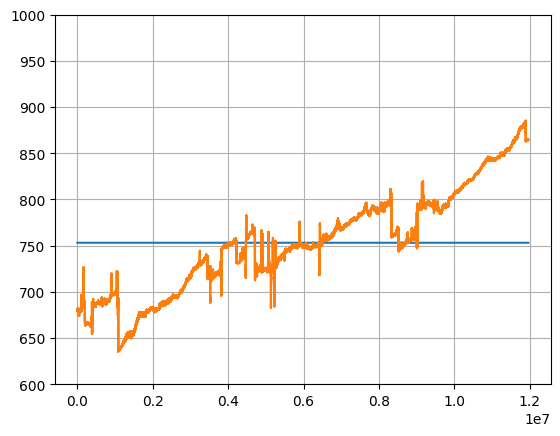

---------------------------------------------------------------------------
| end of epoch  50 | time: 897.49s | valid loss 26.72745 | valid ppl 405119384331.24 |
---------------------------------------------------------------------------
|epoch  51 |     0/  909 batches | lr 0.000350 | loss 0.00023
|epoch  51 |   181/  909 batches | lr 0.000350 | loss 0.04278
|epoch  51 |   362/  909 batches | lr 0.000350 | loss 0.04292
|epoch  51 |   543/  909 batches | lr 0.000350 | loss 0.04295
|epoch  51 |   724/  909 batches | lr 0.000350 | loss 0.04291
|epoch  51 |   905/  909 batches | lr 0.000350 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 33.76it/s]


---------------------------------------------------------------------------
| end of epoch  51 | time: 88.20s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  52 |     0/  909 batches | lr 0.000343 | loss 0.00026
|epoch  52 |   181/  909 batches | lr 0.000343 | loss 0.04276
|epoch  52 |   362/  909 batches | lr 0.000343 | loss 0.04289
|epoch  52 |   543/  909 batches | lr 0.000343 | loss 0.04295
|epoch  52 |   724/  909 batches | lr 0.000343 | loss 0.04274
|epoch  52 |   905/  909 batches | lr 0.000343 | loss 0.04293


100%|██████████| 390/390 [00:11<00:00, 34.53it/s]


---------------------------------------------------------------------------
| end of epoch  52 | time: 86.63s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  53 |     0/  909 batches | lr 0.000336 | loss 0.00025
|epoch  53 |   181/  909 batches | lr 0.000336 | loss 0.04293
|epoch  53 |   362/  909 batches | lr 0.000336 | loss 0.04275
|epoch  53 |   543/  909 batches | lr 0.000336 | loss 0.04284
|epoch  53 |   724/  909 batches | lr 0.000336 | loss 0.04288
|epoch  53 |   905/  909 batches | lr 0.000336 | loss 0.04290


100%|██████████| 390/390 [00:11<00:00, 34.34it/s]


---------------------------------------------------------------------------
| end of epoch  53 | time: 86.56s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  54 |     0/  909 batches | lr 0.000329 | loss 0.00023
|epoch  54 |   181/  909 batches | lr 0.000329 | loss 0.04288
|epoch  54 |   362/  909 batches | lr 0.000329 | loss 0.04287
|epoch  54 |   543/  909 batches | lr 0.000329 | loss 0.04270
|epoch  54 |   724/  909 batches | lr 0.000329 | loss 0.04275
|epoch  54 |   905/  909 batches | lr 0.000329 | loss 0.04307


100%|██████████| 390/390 [00:11<00:00, 34.70it/s]


---------------------------------------------------------------------------
| end of epoch  54 | time: 86.32s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  55 |     0/  909 batches | lr 0.000323 | loss 0.00024
|epoch  55 |   181/  909 batches | lr 0.000323 | loss 0.04297
|epoch  55 |   362/  909 batches | lr 0.000323 | loss 0.04276
|epoch  55 |   543/  909 batches | lr 0.000323 | loss 0.04291
|epoch  55 |   724/  909 batches | lr 0.000323 | loss 0.04295
|epoch  55 |   905/  909 batches | lr 0.000323 | loss 0.04272


100%|██████████| 390/390 [00:11<00:00, 34.96it/s]


---------------------------------------------------------------------------
| end of epoch  55 | time: 86.31s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  56 |     0/  909 batches | lr 0.000316 | loss 0.00024
|epoch  56 |   181/  909 batches | lr 0.000316 | loss 0.04280
|epoch  56 |   362/  909 batches | lr 0.000316 | loss 0.04276
|epoch  56 |   543/  909 batches | lr 0.000316 | loss 0.04278
|epoch  56 |   724/  909 batches | lr 0.000316 | loss 0.04290
|epoch  56 |   905/  909 batches | lr 0.000316 | loss 0.04305


100%|██████████| 390/390 [00:11<00:00, 35.06it/s]


---------------------------------------------------------------------------
| end of epoch  56 | time: 86.30s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  57 |     0/  909 batches | lr 0.000310 | loss 0.00023
|epoch  57 |   181/  909 batches | lr 0.000310 | loss 0.04291
|epoch  57 |   362/  909 batches | lr 0.000310 | loss 0.04278
|epoch  57 |   543/  909 batches | lr 0.000310 | loss 0.04295
|epoch  57 |   724/  909 batches | lr 0.000310 | loss 0.04293
|epoch  57 |   905/  909 batches | lr 0.000310 | loss 0.04267


100%|██████████| 390/390 [00:11<00:00, 33.97it/s]


---------------------------------------------------------------------------
| end of epoch  57 | time: 87.85s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  58 |     0/  909 batches | lr 0.000304 | loss 0.00024
|epoch  58 |   181/  909 batches | lr 0.000304 | loss 0.04275
|epoch  58 |   362/  909 batches | lr 0.000304 | loss 0.04269
|epoch  58 |   543/  909 batches | lr 0.000304 | loss 0.04298
|epoch  58 |   724/  909 batches | lr 0.000304 | loss 0.04305
|epoch  58 |   905/  909 batches | lr 0.000304 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 34.09it/s]


---------------------------------------------------------------------------
| end of epoch  58 | time: 88.13s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  59 |     0/  909 batches | lr 0.000298 | loss 0.00022
|epoch  59 |   181/  909 batches | lr 0.000298 | loss 0.04291
|epoch  59 |   362/  909 batches | lr 0.000298 | loss 0.04293
|epoch  59 |   543/  909 batches | lr 0.000298 | loss 0.04279
|epoch  59 |   724/  909 batches | lr 0.000298 | loss 0.04277
|epoch  59 |   905/  909 batches | lr 0.000298 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 33.94it/s]


---------------------------------------------------------------------------
| end of epoch  59 | time: 88.21s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  60 |     0/  909 batches | lr 0.000292 | loss 0.00021
|epoch  60 |   181/  909 batches | lr 0.000292 | loss 0.04292
|epoch  60 |   362/  909 batches | lr 0.000292 | loss 0.04293
|epoch  60 |   543/  909 batches | lr 0.000292 | loss 0.04281
|epoch  60 |   724/  909 batches | lr 0.000292 | loss 0.04290
|epoch  60 |   905/  909 batches | lr 0.000292 | loss 0.04272


100%|██████████| 390/390 [00:11<00:00, 34.54it/s]


---------------------------------------------------------------------------
| end of epoch  60 | time: 87.52s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  61 |     0/  909 batches | lr 0.000286 | loss 0.00023
|epoch  61 |   181/  909 batches | lr 0.000286 | loss 0.04293
|epoch  61 |   362/  909 batches | lr 0.000286 | loss 0.04271
|epoch  61 |   543/  909 batches | lr 0.000286 | loss 0.04300
|epoch  61 |   724/  909 batches | lr 0.000286 | loss 0.04284
|epoch  61 |   905/  909 batches | lr 0.000286 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 33.84it/s]


---------------------------------------------------------------------------
| end of epoch  61 | time: 87.92s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  62 |     0/  909 batches | lr 0.000280 | loss 0.00023
|epoch  62 |   181/  909 batches | lr 0.000280 | loss 0.04282
|epoch  62 |   362/  909 batches | lr 0.000280 | loss 0.04286
|epoch  62 |   543/  909 batches | lr 0.000280 | loss 0.04270
|epoch  62 |   724/  909 batches | lr 0.000280 | loss 0.04293
|epoch  62 |   905/  909 batches | lr 0.000280 | loss 0.04291


100%|██████████| 390/390 [00:11<00:00, 34.56it/s]


---------------------------------------------------------------------------
| end of epoch  62 | time: 87.15s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  63 |     0/  909 batches | lr 0.000274 | loss 0.00025
|epoch  63 |   181/  909 batches | lr 0.000274 | loss 0.04291
|epoch  63 |   362/  909 batches | lr 0.000274 | loss 0.04287
|epoch  63 |   543/  909 batches | lr 0.000274 | loss 0.04288
|epoch  63 |   724/  909 batches | lr 0.000274 | loss 0.04262
|epoch  63 |   905/  909 batches | lr 0.000274 | loss 0.04294


100%|██████████| 390/390 [00:11<00:00, 35.00it/s]


---------------------------------------------------------------------------
| end of epoch  63 | time: 86.46s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  64 |     0/  909 batches | lr 0.000269 | loss 0.00024
|epoch  64 |   181/  909 batches | lr 0.000269 | loss 0.04284
|epoch  64 |   362/  909 batches | lr 0.000269 | loss 0.04278
|epoch  64 |   543/  909 batches | lr 0.000269 | loss 0.04299
|epoch  64 |   724/  909 batches | lr 0.000269 | loss 0.04284
|epoch  64 |   905/  909 batches | lr 0.000269 | loss 0.04273


100%|██████████| 390/390 [00:11<00:00, 34.39it/s]


---------------------------------------------------------------------------
| end of epoch  64 | time: 87.19s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  65 |     0/  909 batches | lr 0.000264 | loss 0.00023
|epoch  65 |   181/  909 batches | lr 0.000264 | loss 0.04275
|epoch  65 |   362/  909 batches | lr 0.000264 | loss 0.04295
|epoch  65 |   543/  909 batches | lr 0.000264 | loss 0.04269
|epoch  65 |   724/  909 batches | lr 0.000264 | loss 0.04283
|epoch  65 |   905/  909 batches | lr 0.000264 | loss 0.04297


100%|██████████| 390/390 [00:11<00:00, 34.25it/s]


---------------------------------------------------------------------------
| end of epoch  65 | time: 87.32s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  66 |     0/  909 batches | lr 0.000258 | loss 0.00024
|epoch  66 |   181/  909 batches | lr 0.000258 | loss 0.04275
|epoch  66 |   362/  909 batches | lr 0.000258 | loss 0.04298
|epoch  66 |   543/  909 batches | lr 0.000258 | loss 0.04289
|epoch  66 |   724/  909 batches | lr 0.000258 | loss 0.04270
|epoch  66 |   905/  909 batches | lr 0.000258 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 34.38it/s]


---------------------------------------------------------------------------
| end of epoch  66 | time: 87.28s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  67 |     0/  909 batches | lr 0.000253 | loss 0.00023
|epoch  67 |   181/  909 batches | lr 0.000253 | loss 0.04298
|epoch  67 |   362/  909 batches | lr 0.000253 | loss 0.04268
|epoch  67 |   543/  909 batches | lr 0.000253 | loss 0.04284
|epoch  67 |   724/  909 batches | lr 0.000253 | loss 0.04288
|epoch  67 |   905/  909 batches | lr 0.000253 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 34.50it/s]


---------------------------------------------------------------------------
| end of epoch  67 | time: 87.22s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  68 |     0/  909 batches | lr 0.000248 | loss 0.00023
|epoch  68 |   181/  909 batches | lr 0.000248 | loss 0.04287
|epoch  68 |   362/  909 batches | lr 0.000248 | loss 0.04291
|epoch  68 |   543/  909 batches | lr 0.000248 | loss 0.04299
|epoch  68 |   724/  909 batches | lr 0.000248 | loss 0.04289
|epoch  68 |   905/  909 batches | lr 0.000248 | loss 0.04257


100%|██████████| 390/390 [00:11<00:00, 34.05it/s]


---------------------------------------------------------------------------
| end of epoch  68 | time: 87.84s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  69 |     0/  909 batches | lr 0.000243 | loss 0.00022
|epoch  69 |   181/  909 batches | lr 0.000243 | loss 0.04299
|epoch  69 |   362/  909 batches | lr 0.000243 | loss 0.04298
|epoch  69 |   543/  909 batches | lr 0.000243 | loss 0.04293
|epoch  69 |   724/  909 batches | lr 0.000243 | loss 0.04284
|epoch  69 |   905/  909 batches | lr 0.000243 | loss 0.04252


100%|██████████| 390/390 [00:11<00:00, 34.09it/s]


---------------------------------------------------------------------------
| end of epoch  69 | time: 88.26s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  70 |     0/  909 batches | lr 0.000238 | loss 0.00022
|epoch  70 |   181/  909 batches | lr 0.000238 | loss 0.04285
|epoch  70 |   362/  909 batches | lr 0.000238 | loss 0.04280
|epoch  70 |   543/  909 batches | lr 0.000238 | loss 0.04298
|epoch  70 |   724/  909 batches | lr 0.000238 | loss 0.04284
|epoch  70 |   905/  909 batches | lr 0.000238 | loss 0.04274


100%|██████████| 390/390 [00:11<00:00, 34.36it/s]


---------------------------------------------------------------------------
| end of epoch  70 | time: 88.24s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  71 |     0/  909 batches | lr 0.000233 | loss 0.00023
|epoch  71 |   181/  909 batches | lr 0.000233 | loss 0.04269
|epoch  71 |   362/  909 batches | lr 0.000233 | loss 0.04294
|epoch  71 |   543/  909 batches | lr 0.000233 | loss 0.04301
|epoch  71 |   724/  909 batches | lr 0.000233 | loss 0.04262
|epoch  71 |   905/  909 batches | lr 0.000233 | loss 0.04291


100%|██████████| 390/390 [00:11<00:00, 33.82it/s]


---------------------------------------------------------------------------
| end of epoch  71 | time: 88.35s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  72 |     0/  909 batches | lr 0.000229 | loss 0.00023
|epoch  72 |   181/  909 batches | lr 0.000229 | loss 0.04300
|epoch  72 |   362/  909 batches | lr 0.000229 | loss 0.04285
|epoch  72 |   543/  909 batches | lr 0.000229 | loss 0.04280
|epoch  72 |   724/  909 batches | lr 0.000229 | loss 0.04280
|epoch  72 |   905/  909 batches | lr 0.000229 | loss 0.04270


100%|██████████| 390/390 [00:11<00:00, 34.00it/s]


---------------------------------------------------------------------------
| end of epoch  72 | time: 88.15s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  73 |     0/  909 batches | lr 0.000224 | loss 0.00024
|epoch  73 |   181/  909 batches | lr 0.000224 | loss 0.04301
|epoch  73 |   362/  909 batches | lr 0.000224 | loss 0.04275
|epoch  73 |   543/  909 batches | lr 0.000224 | loss 0.04289
|epoch  73 |   724/  909 batches | lr 0.000224 | loss 0.04270
|epoch  73 |   905/  909 batches | lr 0.000224 | loss 0.04279


100%|██████████| 390/390 [00:11<00:00, 34.34it/s]


---------------------------------------------------------------------------
| end of epoch  73 | time: 87.69s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  74 |     0/  909 batches | lr 0.000220 | loss 0.00024
|epoch  74 |   181/  909 batches | lr 0.000220 | loss 0.04294
|epoch  74 |   362/  909 batches | lr 0.000220 | loss 0.04268
|epoch  74 |   543/  909 batches | lr 0.000220 | loss 0.04280
|epoch  74 |   724/  909 batches | lr 0.000220 | loss 0.04284
|epoch  74 |   905/  909 batches | lr 0.000220 | loss 0.04292


100%|██████████| 390/390 [00:11<00:00, 33.81it/s]


---------------------------------------------------------------------------
| end of epoch  74 | time: 87.84s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  75 |     0/  909 batches | lr 0.000215 | loss 0.00023
|epoch  75 |   181/  909 batches | lr 0.000215 | loss 0.04284
|epoch  75 |   362/  909 batches | lr 0.000215 | loss 0.04302
|epoch  75 |   543/  909 batches | lr 0.000215 | loss 0.04277
|epoch  75 |   724/  909 batches | lr 0.000215 | loss 0.04283
|epoch  75 |   905/  909 batches | lr 0.000215 | loss 0.04272


100%|██████████| 390/390 [00:11<00:00, 34.44it/s]


---------------------------------------------------------------------------
| end of epoch  75 | time: 87.89s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  76 |     0/  909 batches | lr 0.000211 | loss 0.00024
|epoch  76 |   181/  909 batches | lr 0.000211 | loss 0.04267
|epoch  76 |   362/  909 batches | lr 0.000211 | loss 0.04294
|epoch  76 |   543/  909 batches | lr 0.000211 | loss 0.04270
|epoch  76 |   724/  909 batches | lr 0.000211 | loss 0.04276
|epoch  76 |   905/  909 batches | lr 0.000211 | loss 0.04308


100%|██████████| 390/390 [00:11<00:00, 33.52it/s]


---------------------------------------------------------------------------
| end of epoch  76 | time: 88.75s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  77 |     0/  909 batches | lr 0.000207 | loss 0.00025
|epoch  77 |   181/  909 batches | lr 0.000207 | loss 0.04284
|epoch  77 |   362/  909 batches | lr 0.000207 | loss 0.04274
|epoch  77 |   543/  909 batches | lr 0.000207 | loss 0.04286
|epoch  77 |   724/  909 batches | lr 0.000207 | loss 0.04282
|epoch  77 |   905/  909 batches | lr 0.000207 | loss 0.04288


100%|██████████| 390/390 [00:11<00:00, 33.76it/s]


---------------------------------------------------------------------------
| end of epoch  77 | time: 88.27s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  78 |     0/  909 batches | lr 0.000203 | loss 0.00024
|epoch  78 |   181/  909 batches | lr 0.000203 | loss 0.04282
|epoch  78 |   362/  909 batches | lr 0.000203 | loss 0.04274
|epoch  78 |   543/  909 batches | lr 0.000203 | loss 0.04279
|epoch  78 |   724/  909 batches | lr 0.000203 | loss 0.04292
|epoch  78 |   905/  909 batches | lr 0.000203 | loss 0.04289


100%|██████████| 390/390 [00:11<00:00, 33.91it/s]


---------------------------------------------------------------------------
| end of epoch  78 | time: 88.95s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  79 |     0/  909 batches | lr 0.000199 | loss 0.00023
|epoch  79 |   181/  909 batches | lr 0.000199 | loss 0.04286
|epoch  79 |   362/  909 batches | lr 0.000199 | loss 0.04289
|epoch  79 |   543/  909 batches | lr 0.000199 | loss 0.04277
|epoch  79 |   724/  909 batches | lr 0.000199 | loss 0.04302
|epoch  79 |   905/  909 batches | lr 0.000199 | loss 0.04257


100%|██████████| 390/390 [00:11<00:00, 34.14it/s]


---------------------------------------------------------------------------
| end of epoch  79 | time: 87.97s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  80 |     0/  909 batches | lr 0.000195 | loss 0.00023
|epoch  80 |   181/  909 batches | lr 0.000195 | loss 0.04256
|epoch  80 |   362/  909 batches | lr 0.000195 | loss 0.04288
|epoch  80 |   543/  909 batches | lr 0.000195 | loss 0.04283
|epoch  80 |   724/  909 batches | lr 0.000195 | loss 0.04282
|epoch  80 |   905/  909 batches | lr 0.000195 | loss 0.04304


100%|██████████| 390/390 [00:11<00:00, 34.00it/s]


---------------------------------------------------------------------------
| end of epoch  80 | time: 87.46s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  81 |     0/  909 batches | lr 0.000191 | loss 0.00024
|epoch  81 |   181/  909 batches | lr 0.000191 | loss 0.04293
|epoch  81 |   362/  909 batches | lr 0.000191 | loss 0.04307
|epoch  81 |   543/  909 batches | lr 0.000191 | loss 0.04292
|epoch  81 |   724/  909 batches | lr 0.000191 | loss 0.04270
|epoch  81 |   905/  909 batches | lr 0.000191 | loss 0.04251


100%|██████████| 390/390 [00:11<00:00, 34.16it/s]


---------------------------------------------------------------------------
| end of epoch  81 | time: 87.46s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  82 |     0/  909 batches | lr 0.000187 | loss 0.00024
|epoch  82 |   181/  909 batches | lr 0.000187 | loss 0.04293
|epoch  82 |   362/  909 batches | lr 0.000187 | loss 0.04272
|epoch  82 |   543/  909 batches | lr 0.000187 | loss 0.04290
|epoch  82 |   724/  909 batches | lr 0.000187 | loss 0.04271
|epoch  82 |   905/  909 batches | lr 0.000187 | loss 0.04288


100%|██████████| 390/390 [00:11<00:00, 34.55it/s]


---------------------------------------------------------------------------
| end of epoch  82 | time: 87.23s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  83 |     0/  909 batches | lr 0.000183 | loss 0.00022
|epoch  83 |   181/  909 batches | lr 0.000183 | loss 0.04289
|epoch  83 |   362/  909 batches | lr 0.000183 | loss 0.04309
|epoch  83 |   543/  909 batches | lr 0.000183 | loss 0.04269
|epoch  83 |   724/  909 batches | lr 0.000183 | loss 0.04271
|epoch  83 |   905/  909 batches | lr 0.000183 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 33.99it/s]


---------------------------------------------------------------------------
| end of epoch  83 | time: 87.53s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  84 |     0/  909 batches | lr 0.000180 | loss 0.00022
|epoch  84 |   181/  909 batches | lr 0.000180 | loss 0.04277
|epoch  84 |   362/  909 batches | lr 0.000180 | loss 0.04299
|epoch  84 |   543/  909 batches | lr 0.000180 | loss 0.04265
|epoch  84 |   724/  909 batches | lr 0.000180 | loss 0.04272
|epoch  84 |   905/  909 batches | lr 0.000180 | loss 0.04299


100%|██████████| 390/390 [00:11<00:00, 34.04it/s]


---------------------------------------------------------------------------
| end of epoch  84 | time: 87.68s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  85 |     0/  909 batches | lr 0.000176 | loss 0.00023
|epoch  85 |   181/  909 batches | lr 0.000176 | loss 0.04270
|epoch  85 |   362/  909 batches | lr 0.000176 | loss 0.04293
|epoch  85 |   543/  909 batches | lr 0.000176 | loss 0.04305
|epoch  85 |   724/  909 batches | lr 0.000176 | loss 0.04273
|epoch  85 |   905/  909 batches | lr 0.000176 | loss 0.04270


100%|██████████| 390/390 [00:11<00:00, 34.02it/s]


---------------------------------------------------------------------------
| end of epoch  85 | time: 87.67s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  86 |     0/  909 batches | lr 0.000172 | loss 0.00025
|epoch  86 |   181/  909 batches | lr 0.000172 | loss 0.04283
|epoch  86 |   362/  909 batches | lr 0.000172 | loss 0.04274
|epoch  86 |   543/  909 batches | lr 0.000172 | loss 0.04282
|epoch  86 |   724/  909 batches | lr 0.000172 | loss 0.04289
|epoch  86 |   905/  909 batches | lr 0.000172 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 33.32it/s]


---------------------------------------------------------------------------
| end of epoch  86 | time: 88.35s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  87 |     0/  909 batches | lr 0.000169 | loss 0.00021
|epoch  87 |   181/  909 batches | lr 0.000169 | loss 0.04276
|epoch  87 |   362/  909 batches | lr 0.000169 | loss 0.04287
|epoch  87 |   543/  909 batches | lr 0.000169 | loss 0.04293
|epoch  87 |   724/  909 batches | lr 0.000169 | loss 0.04271
|epoch  87 |   905/  909 batches | lr 0.000169 | loss 0.04288


100%|██████████| 390/390 [00:11<00:00, 34.54it/s]


---------------------------------------------------------------------------
| end of epoch  87 | time: 88.50s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  88 |     0/  909 batches | lr 0.000166 | loss 0.00025
|epoch  88 |   181/  909 batches | lr 0.000166 | loss 0.04289
|epoch  88 |   362/  909 batches | lr 0.000166 | loss 0.04272
|epoch  88 |   543/  909 batches | lr 0.000166 | loss 0.04274
|epoch  88 |   724/  909 batches | lr 0.000166 | loss 0.04299
|epoch  88 |   905/  909 batches | lr 0.000166 | loss 0.04273


100%|██████████| 390/390 [00:11<00:00, 34.25it/s]


---------------------------------------------------------------------------
| end of epoch  88 | time: 87.71s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  89 |     0/  909 batches | lr 0.000162 | loss 0.00023
|epoch  89 |   181/  909 batches | lr 0.000162 | loss 0.04290
|epoch  89 |   362/  909 batches | lr 0.000162 | loss 0.04280
|epoch  89 |   543/  909 batches | lr 0.000162 | loss 0.04284
|epoch  89 |   724/  909 batches | lr 0.000162 | loss 0.04259
|epoch  89 |   905/  909 batches | lr 0.000162 | loss 0.04299


100%|██████████| 390/390 [00:11<00:00, 32.55it/s]


---------------------------------------------------------------------------
| end of epoch  89 | time: 88.16s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  90 |     0/  909 batches | lr 0.000159 | loss 0.00025
|epoch  90 |   181/  909 batches | lr 0.000159 | loss 0.04300
|epoch  90 |   362/  909 batches | lr 0.000159 | loss 0.04264
|epoch  90 |   543/  909 batches | lr 0.000159 | loss 0.04287
|epoch  90 |   724/  909 batches | lr 0.000159 | loss 0.04285
|epoch  90 |   905/  909 batches | lr 0.000159 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 34.12it/s]


---------------------------------------------------------------------------
| end of epoch  90 | time: 88.77s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  91 |     0/  909 batches | lr 0.000156 | loss 0.00024
|epoch  91 |   181/  909 batches | lr 0.000156 | loss 0.04284
|epoch  91 |   362/  909 batches | lr 0.000156 | loss 0.04278
|epoch  91 |   543/  909 batches | lr 0.000156 | loss 0.04292
|epoch  91 |   724/  909 batches | lr 0.000156 | loss 0.04267
|epoch  91 |   905/  909 batches | lr 0.000156 | loss 0.04289


100%|██████████| 390/390 [00:11<00:00, 34.12it/s]


---------------------------------------------------------------------------
| end of epoch  91 | time: 87.70s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  92 |     0/  909 batches | lr 0.000153 | loss 0.00023
|epoch  92 |   181/  909 batches | lr 0.000153 | loss 0.04294
|epoch  92 |   362/  909 batches | lr 0.000153 | loss 0.04277
|epoch  92 |   543/  909 batches | lr 0.000153 | loss 0.04266
|epoch  92 |   724/  909 batches | lr 0.000153 | loss 0.04292
|epoch  92 |   905/  909 batches | lr 0.000153 | loss 0.04280


100%|██████████| 390/390 [00:11<00:00, 34.17it/s]


---------------------------------------------------------------------------
| end of epoch  92 | time: 87.37s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  93 |     0/  909 batches | lr 0.000150 | loss 0.00022
|epoch  93 |   181/  909 batches | lr 0.000150 | loss 0.04290
|epoch  93 |   362/  909 batches | lr 0.000150 | loss 0.04275
|epoch  93 |   543/  909 batches | lr 0.000150 | loss 0.04271
|epoch  93 |   724/  909 batches | lr 0.000150 | loss 0.04295
|epoch  93 |   905/  909 batches | lr 0.000150 | loss 0.04279


100%|██████████| 390/390 [00:11<00:00, 34.40it/s]


---------------------------------------------------------------------------
| end of epoch  93 | time: 87.40s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  94 |     0/  909 batches | lr 0.000147 | loss 0.00022
|epoch  94 |   181/  909 batches | lr 0.000147 | loss 0.04302
|epoch  94 |   362/  909 batches | lr 0.000147 | loss 0.04273
|epoch  94 |   543/  909 batches | lr 0.000147 | loss 0.04280
|epoch  94 |   724/  909 batches | lr 0.000147 | loss 0.04288
|epoch  94 |   905/  909 batches | lr 0.000147 | loss 0.04263


100%|██████████| 390/390 [00:11<00:00, 34.09it/s]


---------------------------------------------------------------------------
| end of epoch  94 | time: 88.12s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  95 |     0/  909 batches | lr 0.000144 | loss 0.00024
|epoch  95 |   181/  909 batches | lr 0.000144 | loss 0.04266
|epoch  95 |   362/  909 batches | lr 0.000144 | loss 0.04280
|epoch  95 |   543/  909 batches | lr 0.000144 | loss 0.04292
|epoch  95 |   724/  909 batches | lr 0.000144 | loss 0.04296
|epoch  95 |   905/  909 batches | lr 0.000144 | loss 0.04275


100%|██████████| 390/390 [00:11<00:00, 34.84it/s]


---------------------------------------------------------------------------
| end of epoch  95 | time: 86.87s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  96 |     0/  909 batches | lr 0.000141 | loss 0.00025
|epoch  96 |   181/  909 batches | lr 0.000141 | loss 0.04276
|epoch  96 |   362/  909 batches | lr 0.000141 | loss 0.04270
|epoch  96 |   543/  909 batches | lr 0.000141 | loss 0.04280
|epoch  96 |   724/  909 batches | lr 0.000141 | loss 0.04291
|epoch  96 |   905/  909 batches | lr 0.000141 | loss 0.04290


100%|██████████| 390/390 [00:11<00:00, 34.95it/s]


---------------------------------------------------------------------------
| end of epoch  96 | time: 86.09s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  97 |     0/  909 batches | lr 0.000138 | loss 0.00024
|epoch  97 |   181/  909 batches | lr 0.000138 | loss 0.04284
|epoch  97 |   362/  909 batches | lr 0.000138 | loss 0.04293
|epoch  97 |   543/  909 batches | lr 0.000138 | loss 0.04284
|epoch  97 |   724/  909 batches | lr 0.000138 | loss 0.04262
|epoch  97 |   905/  909 batches | lr 0.000138 | loss 0.04281


100%|██████████| 390/390 [00:11<00:00, 34.85it/s]


---------------------------------------------------------------------------
| end of epoch  97 | time: 86.19s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  98 |     0/  909 batches | lr 0.000135 | loss 0.00023
|epoch  98 |   181/  909 batches | lr 0.000135 | loss 0.04270
|epoch  98 |   362/  909 batches | lr 0.000135 | loss 0.04271
|epoch  98 |   543/  909 batches | lr 0.000135 | loss 0.04287
|epoch  98 |   724/  909 batches | lr 0.000135 | loss 0.04298
|epoch  98 |   905/  909 batches | lr 0.000135 | loss 0.04281


100%|██████████| 390/390 [00:11<00:00, 34.88it/s]


---------------------------------------------------------------------------
| end of epoch  98 | time: 86.09s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch  99 |     0/  909 batches | lr 0.000133 | loss 0.00024
|epoch  99 |   181/  909 batches | lr 0.000133 | loss 0.04262
|epoch  99 |   362/  909 batches | lr 0.000133 | loss 0.04279
|epoch  99 |   543/  909 batches | lr 0.000133 | loss 0.04282
|epoch  99 |   724/  909 batches | lr 0.000133 | loss 0.04287
|epoch  99 |   905/  909 batches | lr 0.000133 | loss 0.04295


100%|██████████| 390/390 [00:11<00:00, 34.85it/s]


---------------------------------------------------------------------------
| end of epoch  99 | time: 86.13s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 100 |     0/  909 batches | lr 0.000130 | loss 0.00023
|epoch 100 |   181/  909 batches | lr 0.000130 | loss 0.04258
|epoch 100 |   362/  909 batches | lr 0.000130 | loss 0.04270
|epoch 100 |   543/  909 batches | lr 0.000130 | loss 0.04299
|epoch 100 |   724/  909 batches | lr 0.000130 | loss 0.04295
|epoch 100 |   905/  909 batches | lr 0.000130 | loss 0.04283


100%|██████████| 390/390 [13:26<00:00,  2.07s/it]


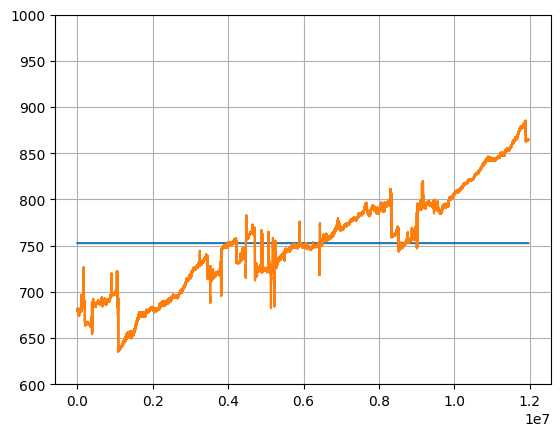

---------------------------------------------------------------------------
| end of epoch 100 | time: 882.93s | valid loss 27.22516 | valid ppl 666404610094.69 |
---------------------------------------------------------------------------
|epoch 101 |     0/  909 batches | lr 0.000127 | loss 0.00023
|epoch 101 |   181/  909 batches | lr 0.000127 | loss 0.04286
|epoch 101 |   362/  909 batches | lr 0.000127 | loss 0.04270
|epoch 101 |   543/  909 batches | lr 0.000127 | loss 0.04301
|epoch 101 |   724/  909 batches | lr 0.000127 | loss 0.04258
|epoch 101 |   905/  909 batches | lr 0.000127 | loss 0.04293


100%|██████████| 390/390 [00:11<00:00, 34.59it/s]


---------------------------------------------------------------------------
| end of epoch 101 | time: 86.22s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 102 |     0/  909 batches | lr 0.000125 | loss 0.00023
|epoch 102 |   181/  909 batches | lr 0.000125 | loss 0.04273
|epoch 102 |   362/  909 batches | lr 0.000125 | loss 0.04277
|epoch 102 |   543/  909 batches | lr 0.000125 | loss 0.04281
|epoch 102 |   724/  909 batches | lr 0.000125 | loss 0.04288
|epoch 102 |   905/  909 batches | lr 0.000125 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 35.20it/s]


---------------------------------------------------------------------------
| end of epoch 102 | time: 86.10s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 103 |     0/  909 batches | lr 0.000122 | loss 0.00025
|epoch 103 |   181/  909 batches | lr 0.000122 | loss 0.04264
|epoch 103 |   362/  909 batches | lr 0.000122 | loss 0.04291
|epoch 103 |   543/  909 batches | lr 0.000122 | loss 0.04288
|epoch 103 |   724/  909 batches | lr 0.000122 | loss 0.04271
|epoch 103 |   905/  909 batches | lr 0.000122 | loss 0.04289


100%|██████████| 390/390 [00:11<00:00, 35.00it/s]


---------------------------------------------------------------------------
| end of epoch 103 | time: 86.30s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 104 |     0/  909 batches | lr 0.000120 | loss 0.00023
|epoch 104 |   181/  909 batches | lr 0.000120 | loss 0.04282
|epoch 104 |   362/  909 batches | lr 0.000120 | loss 0.04278
|epoch 104 |   543/  909 batches | lr 0.000120 | loss 0.04273
|epoch 104 |   724/  909 batches | lr 0.000120 | loss 0.04302
|epoch 104 |   905/  909 batches | lr 0.000120 | loss 0.04274


100%|██████████| 390/390 [00:11<00:00, 34.69it/s]


---------------------------------------------------------------------------
| end of epoch 104 | time: 86.33s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 105 |     0/  909 batches | lr 0.000117 | loss 0.00024
|epoch 105 |   181/  909 batches | lr 0.000117 | loss 0.04295
|epoch 105 |   362/  909 batches | lr 0.000117 | loss 0.04263
|epoch 105 |   543/  909 batches | lr 0.000117 | loss 0.04280
|epoch 105 |   724/  909 batches | lr 0.000117 | loss 0.04283
|epoch 105 |   905/  909 batches | lr 0.000117 | loss 0.04284


100%|██████████| 390/390 [00:11<00:00, 34.85it/s]


---------------------------------------------------------------------------
| end of epoch 105 | time: 86.14s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 106 |     0/  909 batches | lr 0.000115 | loss 0.00026
|epoch 106 |   181/  909 batches | lr 0.000115 | loss 0.04285
|epoch 106 |   362/  909 batches | lr 0.000115 | loss 0.04293
|epoch 106 |   543/  909 batches | lr 0.000115 | loss 0.04252
|epoch 106 |   724/  909 batches | lr 0.000115 | loss 0.04297
|epoch 106 |   905/  909 batches | lr 0.000115 | loss 0.04275


100%|██████████| 390/390 [00:11<00:00, 34.91it/s]


---------------------------------------------------------------------------
| end of epoch 106 | time: 86.15s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 107 |     0/  909 batches | lr 0.000113 | loss 0.00024
|epoch 107 |   181/  909 batches | lr 0.000113 | loss 0.04280
|epoch 107 |   362/  909 batches | lr 0.000113 | loss 0.04295
|epoch 107 |   543/  909 batches | lr 0.000113 | loss 0.04274
|epoch 107 |   724/  909 batches | lr 0.000113 | loss 0.04283
|epoch 107 |   905/  909 batches | lr 0.000113 | loss 0.04272


100%|██████████| 390/390 [00:11<00:00, 34.70it/s]


---------------------------------------------------------------------------
| end of epoch 107 | time: 86.24s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 108 |     0/  909 batches | lr 0.000111 | loss 0.00022
|epoch 108 |   181/  909 batches | lr 0.000111 | loss 0.04293
|epoch 108 |   362/  909 batches | lr 0.000111 | loss 0.04272
|epoch 108 |   543/  909 batches | lr 0.000111 | loss 0.04271
|epoch 108 |   724/  909 batches | lr 0.000111 | loss 0.04268
|epoch 108 |   905/  909 batches | lr 0.000111 | loss 0.04303


100%|██████████| 390/390 [00:11<00:00, 34.79it/s]


---------------------------------------------------------------------------
| end of epoch 108 | time: 86.10s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 109 |     0/  909 batches | lr 0.000108 | loss 0.00024
|epoch 109 |   181/  909 batches | lr 0.000108 | loss 0.04290
|epoch 109 |   362/  909 batches | lr 0.000108 | loss 0.04275
|epoch 109 |   543/  909 batches | lr 0.000108 | loss 0.04279
|epoch 109 |   724/  909 batches | lr 0.000108 | loss 0.04291
|epoch 109 |   905/  909 batches | lr 0.000108 | loss 0.04268


100%|██████████| 390/390 [00:11<00:00, 35.01it/s]


---------------------------------------------------------------------------
| end of epoch 109 | time: 86.13s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 110 |     0/  909 batches | lr 0.000106 | loss 0.00023
|epoch 110 |   181/  909 batches | lr 0.000106 | loss 0.04273
|epoch 110 |   362/  909 batches | lr 0.000106 | loss 0.04288
|epoch 110 |   543/  909 batches | lr 0.000106 | loss 0.04287
|epoch 110 |   724/  909 batches | lr 0.000106 | loss 0.04284
|epoch 110 |   905/  909 batches | lr 0.000106 | loss 0.04271


100%|██████████| 390/390 [00:11<00:00, 35.10it/s]


---------------------------------------------------------------------------
| end of epoch 110 | time: 86.19s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 111 |     0/  909 batches | lr 0.000104 | loss 0.00023
|epoch 111 |   181/  909 batches | lr 0.000104 | loss 0.04279
|epoch 111 |   362/  909 batches | lr 0.000104 | loss 0.04284
|epoch 111 |   543/  909 batches | lr 0.000104 | loss 0.04263
|epoch 111 |   724/  909 batches | lr 0.000104 | loss 0.04288
|epoch 111 |   905/  909 batches | lr 0.000104 | loss 0.04293


100%|██████████| 390/390 [00:11<00:00, 34.70it/s]


---------------------------------------------------------------------------
| end of epoch 111 | time: 86.26s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 112 |     0/  909 batches | lr 0.000102 | loss 0.00023
|epoch 112 |   181/  909 batches | lr 0.000102 | loss 0.04284
|epoch 112 |   362/  909 batches | lr 0.000102 | loss 0.04272
|epoch 112 |   543/  909 batches | lr 0.000102 | loss 0.04277
|epoch 112 |   724/  909 batches | lr 0.000102 | loss 0.04281
|epoch 112 |   905/  909 batches | lr 0.000102 | loss 0.04290


100%|██████████| 390/390 [00:11<00:00, 34.66it/s]


---------------------------------------------------------------------------
| end of epoch 112 | time: 86.12s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 113 |     0/  909 batches | lr 0.000100 | loss 0.00024
|epoch 113 |   181/  909 batches | lr 0.000100 | loss 0.04273
|epoch 113 |   362/  909 batches | lr 0.000100 | loss 0.04289
|epoch 113 |   543/  909 batches | lr 0.000100 | loss 0.04274
|epoch 113 |   724/  909 batches | lr 0.000100 | loss 0.04294
|epoch 113 |   905/  909 batches | lr 0.000100 | loss 0.04273


100%|██████████| 390/390 [00:11<00:00, 34.74it/s]


---------------------------------------------------------------------------
| end of epoch 113 | time: 86.02s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 114 |     0/  909 batches | lr 0.000098 | loss 0.00023
|epoch 114 |   181/  909 batches | lr 0.000098 | loss 0.04286
|epoch 114 |   362/  909 batches | lr 0.000098 | loss 0.04268
|epoch 114 |   543/  909 batches | lr 0.000098 | loss 0.04282
|epoch 114 |   724/  909 batches | lr 0.000098 | loss 0.04283
|epoch 114 |   905/  909 batches | lr 0.000098 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 34.69it/s]


---------------------------------------------------------------------------
| end of epoch 114 | time: 86.07s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 115 |     0/  909 batches | lr 0.000096 | loss 0.00024
|epoch 115 |   181/  909 batches | lr 0.000096 | loss 0.04289
|epoch 115 |   362/  909 batches | lr 0.000096 | loss 0.04293
|epoch 115 |   543/  909 batches | lr 0.000096 | loss 0.04272
|epoch 115 |   724/  909 batches | lr 0.000096 | loss 0.04272
|epoch 115 |   905/  909 batches | lr 0.000096 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 34.97it/s]


---------------------------------------------------------------------------
| end of epoch 115 | time: 86.07s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 116 |     0/  909 batches | lr 0.000094 | loss 0.00023
|epoch 116 |   181/  909 batches | lr 0.000094 | loss 0.04279
|epoch 116 |   362/  909 batches | lr 0.000094 | loss 0.04297
|epoch 116 |   543/  909 batches | lr 0.000094 | loss 0.04267
|epoch 116 |   724/  909 batches | lr 0.000094 | loss 0.04289
|epoch 116 |   905/  909 batches | lr 0.000094 | loss 0.04274


100%|██████████| 390/390 [00:11<00:00, 34.75it/s]


---------------------------------------------------------------------------
| end of epoch 116 | time: 86.20s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 117 |     0/  909 batches | lr 0.000092 | loss 0.00025
|epoch 117 |   181/  909 batches | lr 0.000092 | loss 0.04284
|epoch 117 |   362/  909 batches | lr 0.000092 | loss 0.04271
|epoch 117 |   543/  909 batches | lr 0.000092 | loss 0.04296
|epoch 117 |   724/  909 batches | lr 0.000092 | loss 0.04278
|epoch 117 |   905/  909 batches | lr 0.000092 | loss 0.04273


100%|██████████| 390/390 [00:11<00:00, 34.96it/s]


---------------------------------------------------------------------------
| end of epoch 117 | time: 86.06s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 118 |     0/  909 batches | lr 0.000090 | loss 0.00023
|epoch 118 |   181/  909 batches | lr 0.000090 | loss 0.04272
|epoch 118 |   362/  909 batches | lr 0.000090 | loss 0.04281
|epoch 118 |   543/  909 batches | lr 0.000090 | loss 0.04299
|epoch 118 |   724/  909 batches | lr 0.000090 | loss 0.04255
|epoch 118 |   905/  909 batches | lr 0.000090 | loss 0.04297


100%|██████████| 390/390 [00:11<00:00, 34.64it/s]


---------------------------------------------------------------------------
| end of epoch 118 | time: 86.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 119 |     0/  909 batches | lr 0.000089 | loss 0.00025
|epoch 119 |   181/  909 batches | lr 0.000089 | loss 0.04274
|epoch 119 |   362/  909 batches | lr 0.000089 | loss 0.04291
|epoch 119 |   543/  909 batches | lr 0.000089 | loss 0.04270
|epoch 119 |   724/  909 batches | lr 0.000089 | loss 0.04262
|epoch 119 |   905/  909 batches | lr 0.000089 | loss 0.04304


100%|██████████| 390/390 [00:11<00:00, 34.64it/s]


---------------------------------------------------------------------------
| end of epoch 119 | time: 86.44s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 120 |     0/  909 batches | lr 0.000087 | loss 0.00024
|epoch 120 |   181/  909 batches | lr 0.000087 | loss 0.04286
|epoch 120 |   362/  909 batches | lr 0.000087 | loss 0.04268
|epoch 120 |   543/  909 batches | lr 0.000087 | loss 0.04288
|epoch 120 |   724/  909 batches | lr 0.000087 | loss 0.04267
|epoch 120 |   905/  909 batches | lr 0.000087 | loss 0.04292


100%|██████████| 390/390 [00:11<00:00, 34.64it/s]


---------------------------------------------------------------------------
| end of epoch 120 | time: 86.41s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 121 |     0/  909 batches | lr 0.000085 | loss 0.00024
|epoch 121 |   181/  909 batches | lr 0.000085 | loss 0.04287
|epoch 121 |   362/  909 batches | lr 0.000085 | loss 0.04284
|epoch 121 |   543/  909 batches | lr 0.000085 | loss 0.04275
|epoch 121 |   724/  909 batches | lr 0.000085 | loss 0.04269
|epoch 121 |   905/  909 batches | lr 0.000085 | loss 0.04289


100%|██████████| 390/390 [00:11<00:00, 34.64it/s]


---------------------------------------------------------------------------
| end of epoch 121 | time: 86.39s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 122 |     0/  909 batches | lr 0.000083 | loss 0.00023
|epoch 122 |   181/  909 batches | lr 0.000083 | loss 0.04284
|epoch 122 |   362/  909 batches | lr 0.000083 | loss 0.04296
|epoch 122 |   543/  909 batches | lr 0.000083 | loss 0.04280
|epoch 122 |   724/  909 batches | lr 0.000083 | loss 0.04265
|epoch 122 |   905/  909 batches | lr 0.000083 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 35.08it/s]


---------------------------------------------------------------------------
| end of epoch 122 | time: 86.39s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 123 |     0/  909 batches | lr 0.000082 | loss 0.00025
|epoch 123 |   181/  909 batches | lr 0.000082 | loss 0.04288
|epoch 123 |   362/  909 batches | lr 0.000082 | loss 0.04267
|epoch 123 |   543/  909 batches | lr 0.000082 | loss 0.04245
|epoch 123 |   724/  909 batches | lr 0.000082 | loss 0.04308
|epoch 123 |   905/  909 batches | lr 0.000082 | loss 0.04292


100%|██████████| 390/390 [00:11<00:00, 34.65it/s]


---------------------------------------------------------------------------
| end of epoch 123 | time: 86.55s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 124 |     0/  909 batches | lr 0.000080 | loss 0.00024
|epoch 124 |   181/  909 batches | lr 0.000080 | loss 0.04275
|epoch 124 |   362/  909 batches | lr 0.000080 | loss 0.04280
|epoch 124 |   543/  909 batches | lr 0.000080 | loss 0.04270
|epoch 124 |   724/  909 batches | lr 0.000080 | loss 0.04295
|epoch 124 |   905/  909 batches | lr 0.000080 | loss 0.04283


100%|██████████| 390/390 [00:11<00:00, 35.07it/s]


---------------------------------------------------------------------------
| end of epoch 124 | time: 86.29s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 125 |     0/  909 batches | lr 0.000078 | loss 0.00023
|epoch 125 |   181/  909 batches | lr 0.000078 | loss 0.04267
|epoch 125 |   362/  909 batches | lr 0.000078 | loss 0.04283
|epoch 125 |   543/  909 batches | lr 0.000078 | loss 0.04298
|epoch 125 |   724/  909 batches | lr 0.000078 | loss 0.04285
|epoch 125 |   905/  909 batches | lr 0.000078 | loss 0.04270


100%|██████████| 390/390 [00:11<00:00, 34.65it/s]


---------------------------------------------------------------------------
| end of epoch 125 | time: 86.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 126 |     0/  909 batches | lr 0.000077 | loss 0.00022
|epoch 126 |   181/  909 batches | lr 0.000077 | loss 0.04311
|epoch 126 |   362/  909 batches | lr 0.000077 | loss 0.04263
|epoch 126 |   543/  909 batches | lr 0.000077 | loss 0.04269
|epoch 126 |   724/  909 batches | lr 0.000077 | loss 0.04274
|epoch 126 |   905/  909 batches | lr 0.000077 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 34.69it/s]


---------------------------------------------------------------------------
| end of epoch 126 | time: 86.42s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 127 |     0/  909 batches | lr 0.000075 | loss 0.00023
|epoch 127 |   181/  909 batches | lr 0.000075 | loss 0.04280
|epoch 127 |   362/  909 batches | lr 0.000075 | loss 0.04267
|epoch 127 |   543/  909 batches | lr 0.000075 | loss 0.04286
|epoch 127 |   724/  909 batches | lr 0.000075 | loss 0.04289
|epoch 127 |   905/  909 batches | lr 0.000075 | loss 0.04280


100%|██████████| 390/390 [00:11<00:00, 34.65it/s]


---------------------------------------------------------------------------
| end of epoch 127 | time: 86.46s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 128 |     0/  909 batches | lr 0.000074 | loss 0.00023
|epoch 128 |   181/  909 batches | lr 0.000074 | loss 0.04277
|epoch 128 |   362/  909 batches | lr 0.000074 | loss 0.04296
|epoch 128 |   543/  909 batches | lr 0.000074 | loss 0.04279
|epoch 128 |   724/  909 batches | lr 0.000074 | loss 0.04285
|epoch 128 |   905/  909 batches | lr 0.000074 | loss 0.04268


100%|██████████| 390/390 [00:11<00:00, 34.92it/s]


---------------------------------------------------------------------------
| end of epoch 128 | time: 86.48s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 129 |     0/  909 batches | lr 0.000072 | loss 0.00023
|epoch 129 |   181/  909 batches | lr 0.000072 | loss 0.04278
|epoch 129 |   362/  909 batches | lr 0.000072 | loss 0.04273
|epoch 129 |   543/  909 batches | lr 0.000072 | loss 0.04279
|epoch 129 |   724/  909 batches | lr 0.000072 | loss 0.04295
|epoch 129 |   905/  909 batches | lr 0.000072 | loss 0.04274


100%|██████████| 390/390 [00:11<00:00, 34.91it/s]


---------------------------------------------------------------------------
| end of epoch 129 | time: 86.46s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 130 |     0/  909 batches | lr 0.000071 | loss 0.00025
|epoch 130 |   181/  909 batches | lr 0.000071 | loss 0.04305
|epoch 130 |   362/  909 batches | lr 0.000071 | loss 0.04274
|epoch 130 |   543/  909 batches | lr 0.000071 | loss 0.04277
|epoch 130 |   724/  909 batches | lr 0.000071 | loss 0.04251
|epoch 130 |   905/  909 batches | lr 0.000071 | loss 0.04292


100%|██████████| 390/390 [00:11<00:00, 34.60it/s]


---------------------------------------------------------------------------
| end of epoch 130 | time: 86.58s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 131 |     0/  909 batches | lr 0.000069 | loss 0.00023
|epoch 131 |   181/  909 batches | lr 0.000069 | loss 0.04284
|epoch 131 |   362/  909 batches | lr 0.000069 | loss 0.04285
|epoch 131 |   543/  909 batches | lr 0.000069 | loss 0.04276
|epoch 131 |   724/  909 batches | lr 0.000069 | loss 0.04274
|epoch 131 |   905/  909 batches | lr 0.000069 | loss 0.04285


100%|██████████| 390/390 [00:11<00:00, 34.65it/s]


---------------------------------------------------------------------------
| end of epoch 131 | time: 86.47s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 132 |     0/  909 batches | lr 0.000068 | loss 0.00023
|epoch 132 |   181/  909 batches | lr 0.000068 | loss 0.04270
|epoch 132 |   362/  909 batches | lr 0.000068 | loss 0.04284
|epoch 132 |   543/  909 batches | lr 0.000068 | loss 0.04282
|epoch 132 |   724/  909 batches | lr 0.000068 | loss 0.04271
|epoch 132 |   905/  909 batches | lr 0.000068 | loss 0.04292


100%|██████████| 390/390 [00:11<00:00, 34.58it/s]


---------------------------------------------------------------------------
| end of epoch 132 | time: 86.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 133 |     0/  909 batches | lr 0.000067 | loss 0.00024
|epoch 133 |   181/  909 batches | lr 0.000067 | loss 0.04272
|epoch 133 |   362/  909 batches | lr 0.000067 | loss 0.04282
|epoch 133 |   543/  909 batches | lr 0.000067 | loss 0.04287
|epoch 133 |   724/  909 batches | lr 0.000067 | loss 0.04280
|epoch 133 |   905/  909 batches | lr 0.000067 | loss 0.04277


100%|██████████| 390/390 [00:11<00:00, 34.53it/s]


---------------------------------------------------------------------------
| end of epoch 133 | time: 86.62s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 134 |     0/  909 batches | lr 0.000065 | loss 0.00024
|epoch 134 |   181/  909 batches | lr 0.000065 | loss 0.04283
|epoch 134 |   362/  909 batches | lr 0.000065 | loss 0.04287
|epoch 134 |   543/  909 batches | lr 0.000065 | loss 0.04278
|epoch 134 |   724/  909 batches | lr 0.000065 | loss 0.04273
|epoch 134 |   905/  909 batches | lr 0.000065 | loss 0.04278


100%|██████████| 390/390 [00:11<00:00, 34.48it/s]


---------------------------------------------------------------------------
| end of epoch 134 | time: 86.63s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 135 |     0/  909 batches | lr 0.000064 | loss 0.00025
|epoch 135 |   181/  909 batches | lr 0.000064 | loss 0.04291
|epoch 135 |   362/  909 batches | lr 0.000064 | loss 0.04288
|epoch 135 |   543/  909 batches | lr 0.000064 | loss 0.04285
|epoch 135 |   724/  909 batches | lr 0.000064 | loss 0.04267
|epoch 135 |   905/  909 batches | lr 0.000064 | loss 0.04264


100%|██████████| 390/390 [00:11<00:00, 34.43it/s]


---------------------------------------------------------------------------
| end of epoch 135 | time: 86.76s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 136 |     0/  909 batches | lr 0.000063 | loss 0.00024
|epoch 136 |   181/  909 batches | lr 0.000063 | loss 0.04281
|epoch 136 |   362/  909 batches | lr 0.000063 | loss 0.04262
|epoch 136 |   543/  909 batches | lr 0.000063 | loss 0.04259
|epoch 136 |   724/  909 batches | lr 0.000063 | loss 0.04301
|epoch 136 |   905/  909 batches | lr 0.000063 | loss 0.04298


100%|██████████| 390/390 [00:11<00:00, 34.84it/s]


---------------------------------------------------------------------------
| end of epoch 136 | time: 86.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 137 |     0/  909 batches | lr 0.000062 | loss 0.00024
|epoch 137 |   181/  909 batches | lr 0.000062 | loss 0.04265
|epoch 137 |   362/  909 batches | lr 0.000062 | loss 0.04293
|epoch 137 |   543/  909 batches | lr 0.000062 | loss 0.04278
|epoch 137 |   724/  909 batches | lr 0.000062 | loss 0.04267
|epoch 137 |   905/  909 batches | lr 0.000062 | loss 0.04299


100%|██████████| 390/390 [00:11<00:00, 34.57it/s]


---------------------------------------------------------------------------
| end of epoch 137 | time: 86.74s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 138 |     0/  909 batches | lr 0.000060 | loss 0.00023
|epoch 138 |   181/  909 batches | lr 0.000060 | loss 0.04284
|epoch 138 |   362/  909 batches | lr 0.000060 | loss 0.04295
|epoch 138 |   543/  909 batches | lr 0.000060 | loss 0.04278
|epoch 138 |   724/  909 batches | lr 0.000060 | loss 0.04264
|epoch 138 |   905/  909 batches | lr 0.000060 | loss 0.04279


100%|██████████| 390/390 [00:11<00:00, 34.69it/s]


---------------------------------------------------------------------------
| end of epoch 138 | time: 86.55s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 139 |     0/  909 batches | lr 0.000059 | loss 0.00024
|epoch 139 |   181/  909 batches | lr 0.000059 | loss 0.04278
|epoch 139 |   362/  909 batches | lr 0.000059 | loss 0.04274
|epoch 139 |   543/  909 batches | lr 0.000059 | loss 0.04261
|epoch 139 |   724/  909 batches | lr 0.000059 | loss 0.04286
|epoch 139 |   905/  909 batches | lr 0.000059 | loss 0.04298


100%|██████████| 390/390 [00:11<00:00, 34.42it/s]


---------------------------------------------------------------------------
| end of epoch 139 | time: 86.66s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 140 |     0/  909 batches | lr 0.000058 | loss 0.00022
|epoch 140 |   181/  909 batches | lr 0.000058 | loss 0.04281
|epoch 140 |   362/  909 batches | lr 0.000058 | loss 0.04284
|epoch 140 |   543/  909 batches | lr 0.000058 | loss 0.04273
|epoch 140 |   724/  909 batches | lr 0.000058 | loss 0.04272
|epoch 140 |   905/  909 batches | lr 0.000058 | loss 0.04288


100%|██████████| 390/390 [00:11<00:00, 34.39it/s]


---------------------------------------------------------------------------
| end of epoch 140 | time: 86.66s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 141 |     0/  909 batches | lr 0.000057 | loss 0.00024
|epoch 141 |   181/  909 batches | lr 0.000057 | loss 0.04283
|epoch 141 |   362/  909 batches | lr 0.000057 | loss 0.04273
|epoch 141 |   543/  909 batches | lr 0.000057 | loss 0.04285
|epoch 141 |   724/  909 batches | lr 0.000057 | loss 0.04282
|epoch 141 |   905/  909 batches | lr 0.000057 | loss 0.04277


100%|██████████| 390/390 [00:11<00:00, 35.02it/s]


---------------------------------------------------------------------------
| end of epoch 141 | time: 86.55s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 142 |     0/  909 batches | lr 0.000056 | loss 0.00022
|epoch 142 |   181/  909 batches | lr 0.000056 | loss 0.04267
|epoch 142 |   362/  909 batches | lr 0.000056 | loss 0.04278
|epoch 142 |   543/  909 batches | lr 0.000056 | loss 0.04283
|epoch 142 |   724/  909 batches | lr 0.000056 | loss 0.04282
|epoch 142 |   905/  909 batches | lr 0.000056 | loss 0.04289


100%|██████████| 390/390 [00:11<00:00, 34.54it/s]


---------------------------------------------------------------------------
| end of epoch 142 | time: 86.69s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 143 |     0/  909 batches | lr 0.000055 | loss 0.00023
|epoch 143 |   181/  909 batches | lr 0.000055 | loss 0.04269
|epoch 143 |   362/  909 batches | lr 0.000055 | loss 0.04303
|epoch 143 |   543/  909 batches | lr 0.000055 | loss 0.04270
|epoch 143 |   724/  909 batches | lr 0.000055 | loss 0.04255
|epoch 143 |   905/  909 batches | lr 0.000055 | loss 0.04303


100%|██████████| 390/390 [00:11<00:00, 34.96it/s]


---------------------------------------------------------------------------
| end of epoch 143 | time: 86.49s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 144 |     0/  909 batches | lr 0.000053 | loss 0.00024
|epoch 144 |   181/  909 batches | lr 0.000053 | loss 0.04284
|epoch 144 |   362/  909 batches | lr 0.000053 | loss 0.04310
|epoch 144 |   543/  909 batches | lr 0.000053 | loss 0.04276
|epoch 144 |   724/  909 batches | lr 0.000053 | loss 0.04253
|epoch 144 |   905/  909 batches | lr 0.000053 | loss 0.04276


100%|██████████| 390/390 [00:11<00:00, 34.56it/s]


---------------------------------------------------------------------------
| end of epoch 144 | time: 86.71s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 145 |     0/  909 batches | lr 0.000052 | loss 0.00023
|epoch 145 |   181/  909 batches | lr 0.000052 | loss 0.04280
|epoch 145 |   362/  909 batches | lr 0.000052 | loss 0.04277
|epoch 145 |   543/  909 batches | lr 0.000052 | loss 0.04270
|epoch 145 |   724/  909 batches | lr 0.000052 | loss 0.04277
|epoch 145 |   905/  909 batches | lr 0.000052 | loss 0.04296


100%|██████████| 390/390 [00:11<00:00, 34.62it/s]


---------------------------------------------------------------------------
| end of epoch 145 | time: 86.53s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 146 |     0/  909 batches | lr 0.000051 | loss 0.00024
|epoch 146 |   181/  909 batches | lr 0.000051 | loss 0.04295
|epoch 146 |   362/  909 batches | lr 0.000051 | loss 0.04252
|epoch 146 |   543/  909 batches | lr 0.000051 | loss 0.04292
|epoch 146 |   724/  909 batches | lr 0.000051 | loss 0.04275
|epoch 146 |   905/  909 batches | lr 0.000051 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 34.61it/s]


---------------------------------------------------------------------------
| end of epoch 146 | time: 86.54s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 147 |     0/  909 batches | lr 0.000050 | loss 0.00024
|epoch 147 |   181/  909 batches | lr 0.000050 | loss 0.04273
|epoch 147 |   362/  909 batches | lr 0.000050 | loss 0.04292
|epoch 147 |   543/  909 batches | lr 0.000050 | loss 0.04264
|epoch 147 |   724/  909 batches | lr 0.000050 | loss 0.04283
|epoch 147 |   905/  909 batches | lr 0.000050 | loss 0.04286


100%|██████████| 390/390 [00:11<00:00, 34.90it/s]


---------------------------------------------------------------------------
| end of epoch 147 | time: 86.53s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 148 |     0/  909 batches | lr 0.000049 | loss 0.00023
|epoch 148 |   181/  909 batches | lr 0.000049 | loss 0.04275
|epoch 148 |   362/  909 batches | lr 0.000049 | loss 0.04290
|epoch 148 |   543/  909 batches | lr 0.000049 | loss 0.04280
|epoch 148 |   724/  909 batches | lr 0.000049 | loss 0.04273
|epoch 148 |   905/  909 batches | lr 0.000049 | loss 0.04280


100%|██████████| 390/390 [00:11<00:00, 34.82it/s]


---------------------------------------------------------------------------
| end of epoch 148 | time: 86.60s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 149 |     0/  909 batches | lr 0.000048 | loss 0.00024
|epoch 149 |   181/  909 batches | lr 0.000048 | loss 0.04269
|epoch 149 |   362/  909 batches | lr 0.000048 | loss 0.04274
|epoch 149 |   543/  909 batches | lr 0.000048 | loss 0.04294
|epoch 149 |   724/  909 batches | lr 0.000048 | loss 0.04265
|epoch 149 |   905/  909 batches | lr 0.000048 | loss 0.04297


100%|██████████| 390/390 [00:11<00:00, 34.54it/s]


---------------------------------------------------------------------------
| end of epoch 149 | time: 86.78s | valid loss 0.00010 | valid ppl     1.00 |
---------------------------------------------------------------------------
|epoch 150 |     0/  909 batches | lr 0.000047 | loss 0.00023
|epoch 150 |   181/  909 batches | lr 0.000047 | loss 0.04283
|epoch 150 |   362/  909 batches | lr 0.000047 | loss 0.04294
|epoch 150 |   543/  909 batches | lr 0.000047 | loss 0.04271
|epoch 150 |   724/  909 batches | lr 0.000047 | loss 0.04275
|epoch 150 |   905/  909 batches | lr 0.000047 | loss 0.04275


100%|██████████| 390/390 [13:33<00:00,  2.09s/it]


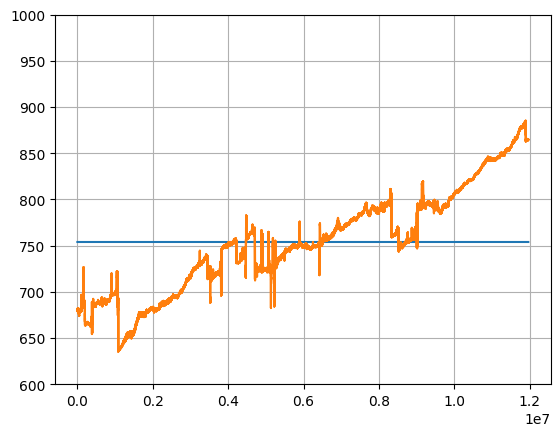

---------------------------------------------------------------------------
| end of epoch 150 | time: 890.10s | valid loss 28.79883 | valid ppl 3214956471399.60 |
---------------------------------------------------------------------------


In [5]:
best_val_loss = float("inf")
best_model = None

for epoch in range(1, epochs + 1):
    start_time = time.time()
    train(model, train_dataloader, device, optimizer, criterion, epoch, scheduler)
    
    if (epoch % 50 == 0):
        truth, test_result, result_to_ML, val_loss = calculate_loss_and_plot(model, test_dataloader, device, criterion, output_window, scaler_test,batch_size)
    else:
        val_loss = evaluate(model, test_dataloader, device, criterion, output_window)
    
    print('-' * 75)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f} |'.format(epoch, (time.time() - start_time),
                                        val_loss, math.exp(val_loss)))
    print('-' * 75)
    
    scheduler.step()

In [ ]:
# train_data.shape
# for batch in train_dataloader:
#     input_batch , label_batch = batch[0].to(device), batch[1].to(device)
    
#     for idx in range(batch_size):
#         input = input_batch[idx].unsqueeze(0)
#         label = label_batch[idx].unsqueeze(0)
#         break
        

# input.shape, label.shape

# X_train.shape #[batch, input_window, 1]
# output = model(input)
# output.shape

# output[:, -output_window:].view(-1).shape
# result_to_ML = []
# test_result = torch.Tensor(0)
# test_result = torch.cat((test_result, output[:, -output_window:].view(-1).cpu()), 0)
# result_to_ML.append(output[:, -output_window:].view(-1).cpu().detach().numpy())
# for list in result_to_ML:
#     print(list)
# for idx, batch in enumerate(tqdm(test_dataloader)):
#             input_batch, label_batch = batch[0].to(device), batch[1].to(device)
#             break
        
# input_batch.shape[0]

# ML

### Train

In [ ]:
from final_functions.final_ML import time_series_dataframe_ML

df_ts_ML, _, _ = time_series_dataframe_ML()

In [1]:
from final_functions.final_ML import ML, make_dataframe
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_ML = make_dataframe(60,1)
X = df_ML.iloc[:, :9].values
y = df_ML['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, shuffle = True)



In [ ]:
params = { 'n_estimators' : [10,20,50,100],
           'max_depth' : [10,20,30,40,50,60],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
ML_model, ML_accuracy = ML()
print(ML_accuracy)

### Transformer output to DataFrame

In [ ]:
from scipy.stats import skew, kurtosis

columns = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : []} #, 'label' : []
for LIST in result_to_ML:
    
    MEAN = np.round(np.mean(LIST), 3)
    MIN = np.min(LIST)
    MAX = np.max(LIST)
    STD = np.std(LIST)
    median = np.median(LIST)
    SKEW = skew(LIST)
    KURT = kurtosis(LIST)
    a, b = np.percentile(LIST, q = [25,75])
    
    #columns['label'].append(i)
    columns['MEAN_TEMP'].append(MEAN)
    columns['MIN'].append(MIN)
    columns['MAX'].append(MAX)
    columns['STD'].append(STD)
    columns['SKEW'].append(SKEW)
    columns['KURT'].append(KURT)
    columns['MEDIAN'].append(np.round(median,3))
    columns['25%'].append(np.round(a,3))
    columns['75%'].append(np.round(b,3))

LABEL = pd.DataFrame({'label' : test_label})

dataframe = pd.DataFrame(columns)
dataframe = pd.concat([dataframe, LABEL], axis = 1)
dataframe